# Assignment Project - DPW Data Analysis_City of Revere, MA

# Report completed by: HASSAN OUKRIS

# Import the relevant libraries

In [1]:
# For these project we will need NumPy, pandas, matplotlib and seaborn
%pylab inline

import os
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from dateutil.parser import parse
from geopy.geocoders import Nominatim
import folium

pd.options.mode.chained_assignment = None  # default='warn'
sns.set()
sns.set(style="whitegrid", color_codes=True)
matplotlib.style.use('seaborn-paper')

Populating the interactive namespace from numpy and matplotlib


# Load the data

In [2]:
# We start by loading the data
data = pd.read_csv(r"C:\Users\Hassan\DPW Data Analysis-City of Revere\DPW Data for Analyst.csv",encoding='latin1' )

# Let's explore the top 5 rows of the df
data.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
0,Complete,187,Pearl Ave,HYWY-Pothole,1/1/2021 1:08:17 PM,fd_revere_integration@dudesolutions.com,2/23/2021 11:28:12 AM
1,Complete,62,Kingman Ave,Signs-New sign installation,1/10/2018 9:13:58 AM,afitzmaurice@revere.org,1/22/2018 12:47:02 PM
2,Complete,52,Shawmut St.,Signs-Sign Repair/Replace,1/10/2019 10:47:32 AM,averdura@revere.org,1/10/2019 11:01:11 AM
3,Complete,NaN,Patriot Pkwy,HYWY-Pothole,1/10/2019 11:16:42 AM,rmondestin@revere.org,1/10/2019 1:50:55 PM
4,Complete,65,Haddon St,HYWY-Pothole,1/10/2019 2:07:17 PM,adeangelis@revere.org,1/10/2019 2:07:18 PM


# Foundational Data Analysis

In [3]:
# Let's get some Statistics with pd.describe
data.describe()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
count,6281,5454,6279,6281,6281,6281,6281
unique,1,640,1743,10,6231,40,6100
top,Complete,0,Broadway,HYWY-Pothole,12/7/2017 12:00:00 AM,fd_revere_integration@dudesolutions.com,9/27/2018 10:45:56 AM
freq,6281,1274,183,2915,5,1109,9


In [4]:
# Drop the Rows with 'NaN' and 'None' Values in Pandas DataFrame
data=data.dropna()
data=data.replace(to_replace='None', value=np.nan).dropna()
data.describe()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
count,5453,5453,5453,5453,5453,5453,5453
unique,1,640,1527,10,5404,40,5307
top,Complete,0,Broadway,HYWY-Pothole,12/7/2017 12:00:00 AM,adeangelis@revere.org,9/27/2018 10:45:56 AM
freq,5453,1274,180,2583,5,850,9


In [5]:
# let's count the number of each work type
data['Work Type'].value_counts()

HYWY-Pothole                   2583
Signs-New sign installation    1183
Water-Hydr Maint                866
Signs-Sign Repair/Replace       575
Signs-Remove Sign               104
Signs-Other                      55
Signs-Change Request             33
Signs-Memorials                  29
Signs-Sign Graffiti              18
Signs-Clean Sign                  7
Name: Work Type, dtype: int64

# 1. Creation of  a chart that shows the month-by-month (January 2018 to July 2021) number of hydrant maintenance work orders that have been completed.

In [6]:
data_hydr=data[(data['Work Type']=='Water-Hydr Maint') & (data['Status']=='Complete')]
data_hydr.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
70,Complete,24,Haskell AVe,Water-Hydr Maint,1/13/2020 4:40:54 PM,fd_revere_integration@dudesolutions.com,1/14/2020 7:23:55 AM
73,Complete,25,True St,Water-Hydr Maint,1/13/2020 9:42:18 AM,cfabiano@revere.org,1/13/2020 9:42:33 AM
136,Complete,89,Pitcairn St,Water-Hydr Maint,1/15/2019 7:25:00 PM,fd_revere_integration@dudesolutions.com,8/21/2019 2:55:02 PM
139,Complete,540,SQUIRE RD,Water-Hydr Maint,1/15/2020 9:14:08 AM,fd_revere_integration@dudesolutions.com,1/15/2020 2:07:39 PM
175,Complete,49,Oak Island St.,Water-Hydr Maint,1/16/2018 9:04:37 AM,rmondestin@revere.org,1/17/2018 10:08:36 AM


In [7]:
# the count for all completed stutus of 'Water-Hydr Maint' work type:
data_hydr['Work Type'].value_counts()

Water-Hydr Maint    866
Name: Work Type, dtype: int64

In [8]:
# data types:
data_hydr.dtypes

Status            object
Address Number    object
Street Name       object
Work Type         object
Date Flagged      object
Flagged By        object
Finalized Date    object
dtype: object

In [9]:
# Converting Strings to datetime in coulumns with dates:
data_hydr['Date Flagged']=pd.to_datetime(data_hydr['Date Flagged'])
data_hydr['Finalized Date']=pd.to_datetime(data_hydr['Finalized Date'])
data_hydr.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
70,Complete,24,Haskell AVe,Water-Hydr Maint,2020-01-13 16:40:54,fd_revere_integration@dudesolutions.com,2020-01-14 07:23:55
73,Complete,25,True St,Water-Hydr Maint,2020-01-13 09:42:18,cfabiano@revere.org,2020-01-13 09:42:33
136,Complete,89,Pitcairn St,Water-Hydr Maint,2019-01-15 19:25:00,fd_revere_integration@dudesolutions.com,2019-08-21 14:55:02
139,Complete,540,SQUIRE RD,Water-Hydr Maint,2020-01-15 09:14:08,fd_revere_integration@dudesolutions.com,2020-01-15 14:07:39
175,Complete,49,Oak Island St.,Water-Hydr Maint,2018-01-16 09:04:37,rmondestin@revere.org,2018-01-17 10:08:36


In [10]:
# Verification of the data type conversion:
data_hydr.dtypes

Status                    object
Address Number            object
Street Name               object
Work Type                 object
Date Flagged      datetime64[ns]
Flagged By                object
Finalized Date    datetime64[ns]
dtype: object

In [11]:
# starting and ending dates of work type "Water-Hydr Maint" data
print("Starting Date for 'Water-Hydr Maint' Work Type:", data_hydr[data_hydr['Finalized Date'] == data_hydr['Finalized Date'].min()].iloc[0,6])
print("Ending Date for 'Water-Hydr Maint' Work Type:", data_hydr[data_hydr['Finalized Date'] == data_hydr['Finalized Date'].max()].iloc[0,6])

Starting Date for 'Water-Hydr Maint' Work Type: 2017-12-20 07:20:48
Ending Date for 'Water-Hydr Maint' Work Type: 2021-07-29 12:55:39


In [12]:
# Creation of Month and Year coulumns of Finalized Date:
data_hydr['Fin_Month'] = pd.to_datetime(data_hydr['Finalized Date']).dt.month
data_hydr['Fin_Year'] = pd.to_datetime(data_hydr['Finalized Date']).dt.year
data_hydr.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year
70,Complete,24,Haskell AVe,Water-Hydr Maint,2020-01-13 16:40:54,fd_revere_integration@dudesolutions.com,2020-01-14 07:23:55,1,2020
73,Complete,25,True St,Water-Hydr Maint,2020-01-13 09:42:18,cfabiano@revere.org,2020-01-13 09:42:33,1,2020
136,Complete,89,Pitcairn St,Water-Hydr Maint,2019-01-15 19:25:00,fd_revere_integration@dudesolutions.com,2019-08-21 14:55:02,8,2019
139,Complete,540,SQUIRE RD,Water-Hydr Maint,2020-01-15 09:14:08,fd_revere_integration@dudesolutions.com,2020-01-15 14:07:39,1,2020
175,Complete,49,Oak Island St.,Water-Hydr Maint,2018-01-16 09:04:37,rmondestin@revere.org,2018-01-17 10:08:36,1,2018


In [13]:
# Creation of Month-Year coulumn for Finalized date:
data_hydr['Fin_M_Y'] = data_hydr['Finalized Date'].dt.strftime('%m-%Y')
# Droping data of year 2017:
data_hydr.drop(data_hydr[(data_hydr["Fin_Year"]==2017)].index,axis=0,inplace=True)
data_hydr.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y
70,Complete,24,Haskell AVe,Water-Hydr Maint,2020-01-13 16:40:54,fd_revere_integration@dudesolutions.com,2020-01-14 07:23:55,1,2020,01-2020
73,Complete,25,True St,Water-Hydr Maint,2020-01-13 09:42:18,cfabiano@revere.org,2020-01-13 09:42:33,1,2020,01-2020
136,Complete,89,Pitcairn St,Water-Hydr Maint,2019-01-15 19:25:00,fd_revere_integration@dudesolutions.com,2019-08-21 14:55:02,8,2019,08-2019
139,Complete,540,SQUIRE RD,Water-Hydr Maint,2020-01-15 09:14:08,fd_revere_integration@dudesolutions.com,2020-01-15 14:07:39,1,2020,01-2020
175,Complete,49,Oak Island St.,Water-Hydr Maint,2018-01-16 09:04:37,rmondestin@revere.org,2018-01-17 10:08:36,1,2018,01-2018


In [14]:
# Converting Strings to datetime:
parse_dates=['Fin_M_Y']
data_hydr['Fin_M_Y']=pd.to_datetime(data_hydr['Fin_M_Y'], format="%m-%Y")
data_hydr.dtypes

Status                    object
Address Number            object
Street Name               object
Work Type                 object
Date Flagged      datetime64[ns]
Flagged By                object
Finalized Date    datetime64[ns]
Fin_Month                  int64
Fin_Year                   int64
Fin_M_Y           datetime64[ns]
dtype: object

In [15]:
# Using Groupby on monthly period and aggregate the data using sum:
df_hydr = data_hydr['Fin_Month'].groupby(data_hydr['Fin_M_Y'].dt.to_period('M')).sum()
df_hydr_pd=pd.DataFrame(df_hydr)
df_hydr_pd=df_hydr_pd.rename(columns={'Fin_Month':'Counts'})
df_hydr_pd.head()

,Counts
Fin_M_Y,
2018-01,5
2018-02,2
2018-07,28
2018-08,8
2018-09,54


Text(0, 0.5, 'Count of Hydrant Maintenance completed Work')

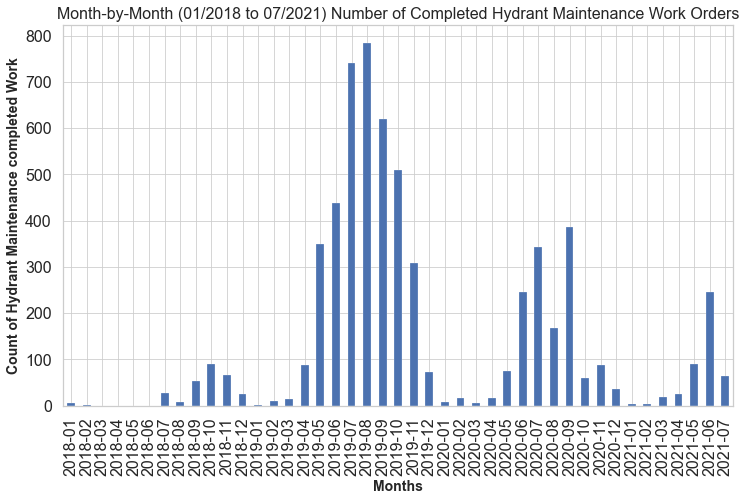

In [16]:
df_hydr = df_hydr.resample('M').asfreq().fillna(0)

# Ploting the data:
ax=df_hydr.plot(kind='bar', fontsize=16, figsize=(12,7))
ax.set_title("Month-by-Month (01/2018 to 07/2021) Number of Completed Hydrant Maintenance Work Orders", fontsize=16)
ax.set_xlabel("Months", weight='bold', fontsize=14)
ax.set_ylabel("Count of Hydrant Maintenance completed Work", weight='bold', fontsize=14)


# 2-Chart showing month-by-month (January 2018 to July 2021) combined average time to close for all work orders in the Signs Division, excluding sign graffiti and sign memorials.

In [17]:
# Preparing the Signs Works Data (Excluding sign graffiti and sign memorials):
data_signs=data[(data['Work Type']=='Signs-New sign installation') | (data['Work Type']=='Signs-Sign Repair/Replace') | 
                (data['Work Type']=='Signs-Remove Sign') | (data['Work Type']=='Signs-Other') | 
                (data['Work Type']=='Signs-Change Request') | (data['Work Type']=='Signs-Clean Sign') ]
data_signs.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
1,Complete,62,Kingman Ave,Signs-New sign installation,1/10/2018 9:13:58 AM,afitzmaurice@revere.org,1/22/2018 12:47:02 PM
2,Complete,52,Shawmut St.,Signs-Sign Repair/Replace,1/10/2019 10:47:32 AM,averdura@revere.org,1/10/2019 11:01:11 AM
9,Complete,18,Walden St,Signs-Remove Sign,1/10/2019 2:46:39 PM,acardona-ramirez@revere.org,1/15/2019 9:03:09 AM
10,Complete,10,Walden St,Signs-New sign installation,1/10/2019 2:48:12 PM,acardona-ramirez@revere.org,1/15/2019 9:03:09 AM
11,Complete,117,Franklin Ave,Signs-Sign Repair/Replace,1/10/2019 2:50:32 PM,acardona-ramirez@revere.org,1/15/2019 9:10:11 AM


In [18]:
# Converting Strings to datetime in coulumns with dates & creation of Month and Year Coulumns:
data_signs['Date Flagged']=pd.to_datetime(data_signs['Date Flagged'])
data_signs['Finalized Date']=pd.to_datetime(data_signs['Finalized Date'])
data_signs['Fin_Month'] = pd.to_datetime(data_signs['Finalized Date']).dt.month
data_signs['Fin_Year'] = pd.to_datetime(data_signs['Finalized Date']).dt.year
data_signs.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year
1,Complete,62,Kingman Ave,Signs-New sign installation,2018-01-10 09:13:58,afitzmaurice@revere.org,2018-01-22 12:47:02,1,2018
2,Complete,52,Shawmut St.,Signs-Sign Repair/Replace,2019-01-10 10:47:32,averdura@revere.org,2019-01-10 11:01:11,1,2019
9,Complete,18,Walden St,Signs-Remove Sign,2019-01-10 14:46:39,acardona-ramirez@revere.org,2019-01-15 09:03:09,1,2019
10,Complete,10,Walden St,Signs-New sign installation,2019-01-10 14:48:12,acardona-ramirez@revere.org,2019-01-15 09:03:09,1,2019
11,Complete,117,Franklin Ave,Signs-Sign Repair/Replace,2019-01-10 14:50:32,acardona-ramirez@revere.org,2019-01-15 09:10:11,1,2019


In [19]:
# Creation of Month-Year coulumn for Finalized date:
data_signs['Fin_M_Y'] = data_signs['Finalized Date'].dt.strftime('%m-%Y')
# Converting Strings to datetime:
parse_dates=['Fin_M_Y']
data_signs['Fin_M_Y']=pd.to_datetime(data_signs['Fin_M_Y'], format="%m-%Y")
data_signs.dtypes

Status                    object
Address Number            object
Street Name               object
Work Type                 object
Date Flagged      datetime64[ns]
Flagged By                object
Finalized Date    datetime64[ns]
Fin_Month                  int64
Fin_Year                   int64
Fin_M_Y           datetime64[ns]
dtype: object

In [20]:
data_signs.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y
1,Complete,62,Kingman Ave,Signs-New sign installation,2018-01-10 09:13:58,afitzmaurice@revere.org,2018-01-22 12:47:02,1,2018,2018-01-01
2,Complete,52,Shawmut St.,Signs-Sign Repair/Replace,2019-01-10 10:47:32,averdura@revere.org,2019-01-10 11:01:11,1,2019,2019-01-01
9,Complete,18,Walden St,Signs-Remove Sign,2019-01-10 14:46:39,acardona-ramirez@revere.org,2019-01-15 09:03:09,1,2019,2019-01-01
10,Complete,10,Walden St,Signs-New sign installation,2019-01-10 14:48:12,acardona-ramirez@revere.org,2019-01-15 09:03:09,1,2019,2019-01-01
11,Complete,117,Franklin Ave,Signs-Sign Repair/Replace,2019-01-10 14:50:32,acardona-ramirez@revere.org,2019-01-15 09:10:11,1,2019,2019-01-01


In [21]:
# Calculates the closing time in days for Signs Work type
data_signs['Close_Time_days']=(data_signs['Finalized Date'] - data_signs['Date Flagged']) / np.timedelta64(1,'D')
# Droping data of year 2017:
data_signs.drop(data_signs[(data_signs["Fin_Year"]==2017)].index,axis=0,inplace=True)
data_signs.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y,Close_Time_days
1,Complete,62,Kingman Ave,Signs-New sign installation,2018-01-10 09:13:58,afitzmaurice@revere.org,2018-01-22 12:47:02,1,2018,2018-01-01,12.147963
2,Complete,52,Shawmut St.,Signs-Sign Repair/Replace,2019-01-10 10:47:32,averdura@revere.org,2019-01-10 11:01:11,1,2019,2019-01-01,0.009479
9,Complete,18,Walden St,Signs-Remove Sign,2019-01-10 14:46:39,acardona-ramirez@revere.org,2019-01-15 09:03:09,1,2019,2019-01-01,4.761458
10,Complete,10,Walden St,Signs-New sign installation,2019-01-10 14:48:12,acardona-ramirez@revere.org,2019-01-15 09:03:09,1,2019,2019-01-01,4.760382
11,Complete,117,Franklin Ave,Signs-Sign Repair/Replace,2019-01-10 14:50:32,acardona-ramirez@revere.org,2019-01-15 09:10:11,1,2019,2019-01-01,4.763646


# Let's create data frame for each of the 6 Signs Work Type

# 2.1- Dataframe for 'Signs-New Sign installation' Work Type

In [22]:
# Dataframe for Signs-New Sign installation Work Type
df_NSI=data_signs[data_signs['Work Type']=='Signs-New sign installation']
df_NSI.drop(df_NSI[(df_NSI["Fin_Year"]==2017)].index,axis=0,inplace=True)
df_NSI.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y,Close_Time_days
1,Complete,62,Kingman Ave,Signs-New sign installation,2018-01-10 09:13:58,afitzmaurice@revere.org,2018-01-22 12:47:02,1,2018,2018-01-01,12.147963
10,Complete,10,Walden St,Signs-New sign installation,2019-01-10 14:48:12,acardona-ramirez@revere.org,2019-01-15 09:03:09,1,2019,2019-01-01,4.760382
19,Complete,65,Kimball Ave,Signs-New sign installation,2021-01-10 23:18:00,fd_revere_integration@dudesolutions.com,2021-05-18 10:24:02,5,2021,2021-05-01,127.462523
20,Complete,48,Standish Rd,Signs-New sign installation,2021-01-10 23:22:00,fd_revere_integration@dudesolutions.com,2021-01-27 11:44:10,1,2021,2021-01-01,16.515394
27,Complete,0,Foam Ave,Signs-New sign installation,2021-01-11 10:03:38,mpetrigno@revere.org,2021-01-11 10:03:39,1,2021,2021-01-01,0.000012


In [23]:
# Calculating the monthly average time close and the count of Work Type in that month:
df_NSI_Av_Close_Time=df_NSI['Close_Time_days'].groupby(df_NSI['Fin_M_Y'].dt.to_period('M')).mean()
df_NSI_Size_Close_Time=df_NSI['Close_Time_days'].groupby(df_NSI['Fin_M_Y'].dt.to_period('M')).size()

df_NSI_Av_Close_Time_pd=pd.DataFrame(df_NSI_Av_Close_Time)
df_NSI_Av_Close_Time_pd=df_NSI_Av_Close_Time_pd.rename(columns={'Close_Time_days':'NSI_Av_Time_Close'})

df_NSI_Size_Close_Time_pd=pd.DataFrame(df_NSI_Size_Close_Time)
df_NSI_Size_Close_Time_pd=df_NSI_Size_Close_Time_pd.rename(columns={'Close_Time_days':'NSI_Size_Time_Close'})

df_NSI_Av_Close_Time_pd
df_NSI_Size_Close_Time_pd
df_NSI_Av=pd.concat([df_NSI_Av_Close_Time_pd,df_NSI_Size_Close_Time_pd], axis=1)
df_NSI_Av.head()

,NSI_Av_Time_Close,NSI_Size_Time_Close
Fin_M_Y,,
2018-01,32.215844,10
2018-02,23.051841,12
2018-03,16.972137,8
2018-04,16.291236,15
2018-05,3.177339,12


# 2.2- Dataframe for 'Signs-Sign Repair/Replace' Work Type

In [24]:
# Dataframe for Signs-Sign Repair/Replace Work Type
df_SRR=data_signs[data_signs['Work Type']=='Signs-Sign Repair/Replace']
df_SRR.drop(df_SRR[(df_SRR["Fin_Year"]==2017)].index,axis=0,inplace=True)
df_SRR.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y,Close_Time_days
2,Complete,52,Shawmut St.,Signs-Sign Repair/Replace,2019-01-10 10:47:32,averdura@revere.org,2019-01-10 11:01:11,1,2019,2019-01-01,0.009479
11,Complete,117,Franklin Ave,Signs-Sign Repair/Replace,2019-01-10 14:50:32,acardona-ramirez@revere.org,2019-01-15 09:10:11,1,2019,2019-01-01,4.763646
37,Complete,3,Centennial Ave,Signs-Sign Repair/Replace,2021-01-11 11:40:23,fd_revere_integration@dudesolutions.com,2021-01-13 09:28:00,1,2021,2021-01-01,1.908067
38,Complete,200,Walnut Ave,Signs-Sign Repair/Replace,2021-01-11 11:40:25,fd_revere_integration@dudesolutions.com,2021-01-13 10:18:47,1,2021,2021-01-01,1.943310
42,Complete,0,Ocean Pier Ave,Signs-Sign Repair/Replace,2021-01-11 08:54:19,mpetrigno@revere.org,2021-01-11 08:54:20,1,2021,2021-01-01,0.000012


In [25]:
# Calculating the monthly average time close and the count of Work Type in that month:
df_SRR_Av_Close_Time=df_SRR['Close_Time_days'].groupby(df_SRR['Fin_M_Y'].dt.to_period('M')).mean()
df_SRR_Size_Close_Time=df_SRR['Close_Time_days'].groupby(df_SRR['Fin_M_Y'].dt.to_period('M')).size()

df_SRR_Av_Close_Time_pd=pd.DataFrame(df_SRR_Av_Close_Time)
df_SRR_Av_Close_Time_pd=df_SRR_Av_Close_Time_pd.rename(columns={'Close_Time_days':'SRR_Av_Time_Close'})

df_SRR_Size_Close_Time_pd=pd.DataFrame(df_SRR_Size_Close_Time)
df_SRR_Size_Close_Time_pd=df_SRR_Size_Close_Time_pd.rename(columns={'Close_Time_days':'SRR_Size_Time_Close'})

df_SRR_Av_Close_Time_pd
df_SRR_Size_Close_Time_pd
df_SRR_Av=pd.concat([df_SRR_Av_Close_Time_pd,df_SRR_Size_Close_Time_pd], axis=1)
df_SRR_Av.head()

,SRR_Av_Time_Close,SRR_Size_Time_Close
Fin_M_Y,,
2018-01,26.222233,18
2018-02,7.330720,6
2018-03,11.144990,6
2018-04,30.515711,15
2018-05,1.719129,13


# 2.3- Dataframe for 'Signs-Remove Sign' Work Type

In [26]:
# Dataframe for Signs-Remove Sign Work Type
df_SRS=data_signs[data_signs['Work Type']=='Signs-Remove Sign']
df_SRS.drop(df_SRS[(df_SRS["Fin_Year"]==2017)].index,axis=0,inplace=True)
df_SRS.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y,Close_Time_days
9,Complete,18,Walden St,Signs-Remove Sign,2019-01-10 14:46:39,acardona-ramirez@revere.org,2019-01-15 09:03:09,1,2019,2019-01-01,4.761458
259,Complete,37,Hillside Ave,Signs-Remove Sign,2019-01-02 09:13:13,acardona-ramirez@revere.org,2019-01-03 11:55:50,1,2019,2019-01-01,1.112928
648,Complete,45,Walnut Ave,Signs-Remove Sign,2019-01-07 13:03:36,rmondestin@revere.org,2019-01-08 11:29:15,1,2019,2019-01-01,0.934479
688,Complete,115,Thornton St,Signs-Remove Sign,2021-01-08 07:36:10,fd_revere_integration@dudesolutions.com,2021-01-08 11:46:11,1,2021,2021-01-01,0.173623
717,Complete,589,Lynn St,Signs-Remove Sign,2018-10-01 15:34:23,rmondestin@revere.org,2018-10-02 08:46:31,10,2018,2018-10-01,0.716759


In [27]:
# Calculating the monthly average time close and the count of Work Type in that month:
df_SRS_Av_Close_Time=df_SRS['Close_Time_days'].groupby(df_SRS['Fin_M_Y'].dt.to_period('M')).mean()
df_SRS_Size_Close_Time=df_SRS['Close_Time_days'].groupby(df_SRS['Fin_M_Y'].dt.to_period('M')).size()

df_SRS_Av_Close_Time_pd=pd.DataFrame(df_SRS_Av_Close_Time)
df_SRS_Av_Close_Time_pd=df_SRS_Av_Close_Time_pd.rename(columns={'Close_Time_days':'SRS_Av_Time_Close'})

df_SRS_Size_Close_Time_pd=pd.DataFrame(df_SRS_Size_Close_Time)
df_SRS_Size_Close_Time_pd=df_SRS_Size_Close_Time_pd.rename(columns={'Close_Time_days':'SRS_Size_Time_Close'})

df_SRS_Av_Close_Time_pd
df_SRS_Size_Close_Time_pd
df_SRS_Av=pd.concat([df_SRS_Av_Close_Time_pd,df_SRS_Size_Close_Time_pd], axis=1)
df_SRS_Av.head()

,SRS_Av_Time_Close,SRS_Size_Time_Close
Fin_M_Y,,
2018-08,83.051716,10
2018-09,1.105486,1
2018-10,1.135428,3
2018-11,0.848316,2
2018-12,37.904769,1


# 2.4- Dataframe for 'Signs-Other' Work Type

In [28]:
# Dataframe for Signs-Other Work Type
df_SO=data_signs[data_signs['Work Type']=='Signs-Other']
df_SO.drop(df_SO[(df_SO["Fin_Year"]==2017)].index,axis=0,inplace=True)
df_SO.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y,Close_Time_days
266,Complete,295,Endicott Ave,Signs-Other,2019-01-20 09:05:09,acardona-ramirez@revere.org,2019-01-20 13:57:08,1,2019,2019-01-01,0.202766
539,Complete,0,Foster St,Signs-Other,2021-01-28 08:07:37,mpetrigno@revere.org,2021-01-28 10:37:30,1,2021,2021-01-01,0.104086
540,Complete,0,Foster St,Signs-Other,2021-01-28 08:32:33,mpetrigno@revere.org,2021-01-28 08:32:34,1,2021,2021-01-01,0.000012
638,Complete,0,Municipal Lot Central Ave,Signs-Other,2021-01-06 11:08:03,mdigregorio@revere.org,2021-01-06 11:08:04,1,2021,2021-01-01,0.000012
690,Complete,30,Bosson St,Signs-Other,2018-01-09 14:10:54,rkantor@revere.org,2018-01-19 12:39:34,1,2018,2018-01-01,9.936574


In [29]:
# Calculating the monthly average time close and the count of Work Type in that month:
df_SO_Av_Close_Time=df_SO['Close_Time_days'].groupby(df_SO['Fin_M_Y'].dt.to_period('M')).mean()
df_SO_Size_Close_Time=df_SO['Close_Time_days'].groupby(df_SO['Fin_M_Y'].dt.to_period('M')).size()

df_SO_Av_Close_Time_pd=pd.DataFrame(df_SO_Av_Close_Time)
df_SO_Av_Close_Time_pd=df_SO_Av_Close_Time_pd.rename(columns={'Close_Time_days':'SO_Av_Time_Close'})

df_SO_Size_Close_Time_pd=pd.DataFrame(df_SO_Size_Close_Time)
df_SO_Size_Close_Time_pd=df_SO_Size_Close_Time_pd.rename(columns={'Close_Time_days':'SO_Size_Time_Close'})

df_SO_Av_Close_Time_pd
df_SO_Size_Close_Time_pd
df_SO_Av=pd.concat([df_SO_Av_Close_Time_pd,df_SO_Size_Close_Time_pd], axis=1)
df_SO_Av.head()

,SO_Av_Time_Close,SO_Size_Time_Close
Fin_M_Y,,
2018-01,9.936574,1
2018-02,4.998027,2
2018-04,14.886995,3
2018-06,2.083090,1
2018-08,0.001863,1


# 2.5- Dataframe for 'Signs-Change Request' Work Type

In [30]:
# Dataframe for Signs-Change Request Work Type
df_SCR=data_signs[data_signs['Work Type']=='Signs-Change Request']
df_SCR.drop(df_SCR[(df_SCR["Fin_Year"]==2017)].index,axis=0,inplace=True)
df_SCR.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y,Close_Time_days
127,Complete,15,Everard St,Signs-Change Request,2021-01-14 20:34:44,mbasta@revere.org,2021-01-27 11:09:46,1,2021,2021-01-01,12.607662
194,Complete,199,Oxford St,Signs-Change Request,2019-01-17 10:41:23,acardona-ramirez@revere.org,2019-01-18 10:48:41,1,2019,2019-01-01,1.005069
552,Complete,1510,N Shore Rd,Signs-Change Request,2018-01-29 15:47:57,rmondestin@revere.org,2018-02-01 12:26:50,2,2018,2018-02-01,2.860336
556,Complete,21,Wolcott Rd,Signs-Change Request,2018-01-29 16:56:06,rmondestin@revere.org,2018-01-31 10:51:20,1,2018,2018-01-01,1.746690
721,Complete,104,Cary Ave,Signs-Change Request,2019-10-01 15:49:26,acardona-ramirez@revere.org,2019-10-08 13:42:35,10,2019,2019-10-01,6.911910


In [31]:
# Calculating the monthly average time close and the count of Work Type in that month:
df_SCR_Av_Close_Time=df_SCR['Close_Time_days'].groupby(df_SCR['Fin_M_Y'].dt.to_period('M')).mean()
df_SCR_Size_Close_Time=df_SCR['Close_Time_days'].groupby(df_SCR['Fin_M_Y'].dt.to_period('M')).size()

df_SCR_Av_Close_Time_pd=pd.DataFrame(df_SCR_Av_Close_Time)
df_SCR_Av_Close_Time_pd=df_SCR_Av_Close_Time_pd.rename(columns={'Close_Time_days':'SCR_Av_Time_Close'})

df_SCR_Size_Close_Time_pd=pd.DataFrame(df_SCR_Size_Close_Time)
df_SCR_Size_Close_Time_pd=df_SCR_Size_Close_Time_pd.rename(columns={'Close_Time_days':'SCR_Size_Time_Close'})

df_SCR_Av_Close_Time_pd
df_SCR_Size_Close_Time_pd
df_SCR_Av=pd.concat([df_SCR_Av_Close_Time_pd,df_SCR_Size_Close_Time_pd], axis=1)
df_SCR_Av.head()

,SCR_Av_Time_Close,SCR_Size_Time_Close
Fin_M_Y,,
2018-01,1.746690,1
2018-02,2.860336,1
2018-04,0.016100,1
2018-05,0.002338,1
2018-07,11.962222,3


# 2.6- Dataframe for 'Signs-Clean Sign' Work Type 

In [32]:
# Dataframe for Signs-Change Request Work Type
df_SCS=data_signs[data_signs['Work Type']=='Signs-Clean Sign']
df_SCS.drop(df_SCS[(df_SCS["Fin_Year"]==2017)].index,axis=0,inplace=True)
df_SCS.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y,Close_Time_days
777,Complete,261,Bellingham Ave,Signs-Clean Sign,2019-10-15 15:49:45,acardona-ramirez@revere.org,2019-10-17 11:28:46,10,2019,2019-10-01,1.818762
1811,Complete,71,Salem St,Signs-Clean Sign,2018-02-20 08:40:38,rmondestin@revere.org,2018-03-28 12:43:50,3,2018,2018-03-01,36.168889
2147,Complete,20,Beach St,Signs-Clean Sign,2018-02-07 14:14:42,dgoodwin@revere.org,2018-04-03 10:07:17,4,2018,2018-04-01,54.828183
2459,Complete,537,Revere St,Signs-Clean Sign,2018-03-22 10:05:29,afitzmaurice@revere.org,2018-03-27 09:31:48,3,2018,2018-03-01,4.976609
3660,Complete,0,City Yard,Signs-Clean Sign,2018-05-16 12:06:43,averdura@revere.org,2018-05-16 12:08:06,5,2018,2018-05-01,0.000961


In [33]:
# Calculating the monthly average time close and the count of Work Type in that month:
df_SCS_Av_Close_Time=df_SCS['Close_Time_days'].groupby(df_SCS['Fin_M_Y'].dt.to_period('M')).mean()
df_SCS_Size_Close_Time=df_SCS['Close_Time_days'].groupby(df_SCS['Fin_M_Y'].dt.to_period('M')).size()

df_SCS_Av_Close_Time_pd=pd.DataFrame(df_SCS_Av_Close_Time)
df_SCS_Av_Close_Time_pd=df_SCS_Av_Close_Time_pd.rename(columns={'Close_Time_days':'SCS_Av_Time_Close'})

df_SCS_Size_Close_Time_pd=pd.DataFrame(df_SCS_Size_Close_Time)
df_SCS_Size_Close_Time_pd=df_SCS_Size_Close_Time_pd.rename(columns={'Close_Time_days':'SCS_Size_Time_Close'})

df_SCS_Av_Close_Time_pd
df_SCS_Size_Close_Time_pd
df_SCS_Av=pd.concat([df_SCS_Av_Close_Time_pd,df_SCS_Size_Close_Time_pd], axis=1)
df_SCS_Av.head()

,SCS_Av_Time_Close,SCS_Size_Time_Close
Fin_M_Y,,
2018-03,20.572749,2
2018-04,54.828183,1
2018-05,0.004161,2
2019-10,1.818762,1
2021-06,0.001887,1


# 2.7-Combining all DataFrames of the 6 Work Type

In [34]:
#Combining all DataFrames of the 6 Work Type in one DataFrame
df_Signs_Av_Time_Close=pd.concat([df_NSI_Av,df_SRR_Av,df_SRS_Av,df_SO_Av,df_SCR_Av,df_SCS_Av], axis=1)
df_Signs_Av_Time_Close.head()

,NSI_Av_Time_Close,NSI_Size_Time_Close,SRR_Av_Time_Close,SRR_Size_Time_Close,SRS_Av_Time_Close,SRS_Size_Time_Close,SO_Av_Time_Close,SO_Size_Time_Close,SCR_Av_Time_Close,SCR_Size_Time_Close,SCS_Av_Time_Close,SCS_Size_Time_Close
Fin_M_Y,,,,,,,,,,,,
2018-01,32.215844,10,26.222233,18.0,NaN,NaN,9.936574,1.0,1.746690,1.0,NaN,NaN
2018-02,23.051841,12,7.330720,6.0,NaN,NaN,4.998027,2.0,2.860336,1.0,NaN,NaN
2018-03,16.972137,8,11.144990,6.0,NaN,NaN,NaN,NaN,NaN,NaN,20.572749,2.0
2018-04,16.291236,15,30.515711,15.0,NaN,NaN,14.886995,3.0,0.016100,1.0,54.828183,1.0
2018-05,3.177339,12,1.719129,13.0,NaN,NaN,NaN,NaN,0.002338,1.0,0.004161,2.0


In [35]:
# Replacing NaN value with 0 in the DataFrame
df_Signs_Av_Time_Close=df_Signs_Av_Time_Close.fillna(0)
df_Signs_Av_Time_Close.head()

,NSI_Av_Time_Close,NSI_Size_Time_Close,SRR_Av_Time_Close,SRR_Size_Time_Close,SRS_Av_Time_Close,SRS_Size_Time_Close,SO_Av_Time_Close,SO_Size_Time_Close,SCR_Av_Time_Close,SCR_Size_Time_Close,SCS_Av_Time_Close,SCS_Size_Time_Close
Fin_M_Y,,,,,,,,,,,,
2018-01,32.215844,10,26.222233,18.0,0.0,0.0,9.936574,1.0,1.746690,1.0,0.000000,0.0
2018-02,23.051841,12,7.330720,6.0,0.0,0.0,4.998027,2.0,2.860336,1.0,0.000000,0.0
2018-03,16.972137,8,11.144990,6.0,0.0,0.0,0.000000,0.0,0.000000,0.0,20.572749,2.0
2018-04,16.291236,15,30.515711,15.0,0.0,0.0,14.886995,3.0,0.016100,1.0,54.828183,1.0
2018-05,3.177339,12,1.719129,13.0,0.0,0.0,0.000000,0.0,0.002338,1.0,0.004161,2.0


# 2.8-Calculating the combined average time to close for all work orders in the Signs Division, excluding sign graffiti and sign memorials

In [36]:
df_Signs_Av_Time_Close['Com_Av_Time Close']=((df_Signs_Av_Time_Close['NSI_Av_Time_Close']*df_Signs_Av_Time_Close['NSI_Size_Time_Close'])
                                            +(df_Signs_Av_Time_Close['SRR_Av_Time_Close']*df_Signs_Av_Time_Close['SRR_Size_Time_Close'])
                                            +(df_Signs_Av_Time_Close['SRS_Av_Time_Close']*df_Signs_Av_Time_Close['SRS_Size_Time_Close'])
                                            +(df_Signs_Av_Time_Close['SO_Av_Time_Close']*df_Signs_Av_Time_Close['SO_Size_Time_Close'])
                                            +(df_Signs_Av_Time_Close['SCR_Av_Time_Close']*df_Signs_Av_Time_Close['SCR_Size_Time_Close'])
                                            +(df_Signs_Av_Time_Close['SCS_Av_Time_Close']*df_Signs_Av_Time_Close['SCS_Size_Time_Close']))/(df_Signs_Av_Time_Close['NSI_Size_Time_Close']+df_Signs_Av_Time_Close['SRR_Size_Time_Close']
                                            +df_Signs_Av_Time_Close['SRS_Size_Time_Close']+df_Signs_Av_Time_Close['SO_Size_Time_Close']
                                            +df_Signs_Av_Time_Close['SCR_Size_Time_Close']+df_Signs_Av_Time_Close['SCS_Size_Time_Close'])
df_Signs_Av_Time_Close.head()

,NSI_Av_Time_Close,NSI_Size_Time_Close,SRR_Av_Time_Close,SRR_Size_Time_Close,SRS_Av_Time_Close,SRS_Size_Time_Close,SO_Av_Time_Close,SO_Size_Time_Close,SCR_Av_Time_Close,SCR_Size_Time_Close,SCS_Av_Time_Close,SCS_Size_Time_Close,Com_Av_Time Close
Fin_M_Y,,,,,,,,,,,,,
2018-01,32.215844,10,26.222233,18.0,0.0,0.0,9.936574,1.0,1.746690,1.0,0.000000,0.0,26.861396
2018-02,23.051841,12,7.330720,6.0,0.0,0.0,4.998027,2.0,2.860336,1.0,0.000000,0.0,15.879181
2018-03,16.972137,8,11.144990,6.0,0.0,0.0,0.000000,0.0,0.000000,0.0,20.572749,2.0,15.237033
2018-04,16.291236,15,30.515711,15.0,0.0,0.0,14.886995,3.0,0.016100,1.0,54.828183,1.0,22.903128
2018-05,3.177339,12,1.719129,13.0,0.0,0.0,0.000000,0.0,0.002338,1.0,0.004161,2.0,2.160265


Text(0, 0.5, "Combined Average Time in 'Days'")

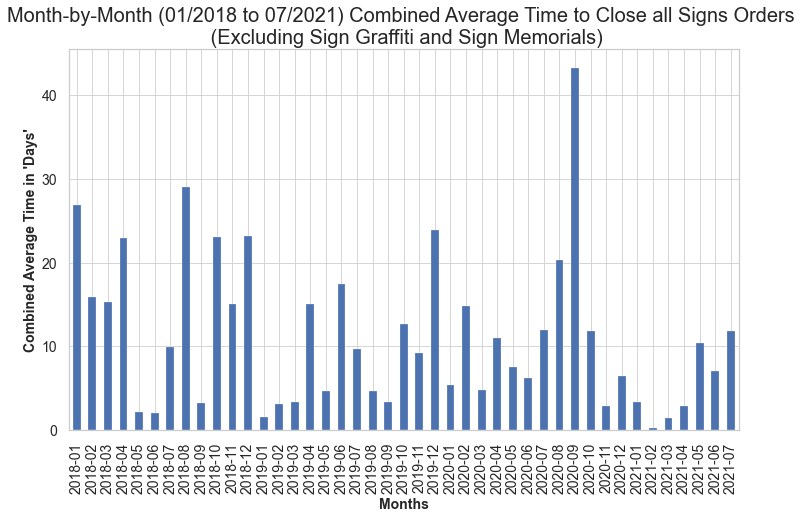

In [37]:
# Ploting the data:
ax=df_Signs_Av_Time_Close['Com_Av_Time Close'].plot(kind='bar', fontsize=14, figsize=(12,7))
ax.set_title("Month-by-Month (01/2018 to 07/2021) Combined Average Time to Close all Signs Orders \n (Excluding Sign Graffiti and Sign Memorials)", fontsize=20)
ax.set_xlabel("Months", weight='bold', fontsize=14)
ax.set_ylabel("Combined Average Time in 'Days'", weight='bold', fontsize=14)

# 3.	Build a month-by-month chart (January 2018 to July 2021) that shows the percentage of 311-reported potholes that are marked as complete in under 2 weeks from the initial report date. (  a. On that same chart show the percentage of potholes reported by anyone not associated with 311 completed in under 2 weeks?)


In [38]:
# Preparing the 311-reported potholes Data):
data_path_311=data[(data['Work Type']=='HYWY-Pothole') & ((data['Flagged By']=='acordona-ramirez@revere.org') | 
                   (data['Flagged By']=='afitzmaurice@revere.org') | 
                   (data['Flagged By']=='dcardona@revere.org') | (data['Flagged By']=='dsaopedro@revere.org') | 
                   (data['Flagged By']=='fd_revere_integration@dude_solutions.com') | 
                   (data['Flagged By']=='jmoncada@revere.org') | (data['Flagged By']=='nromano@revere.org') | 
                   (data['Flagged By']=='rkantor@revere.org') | (data['Flagged By']=='rmondestin@revere.org'))]
data_path_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
17,Complete,321R,Charger Street,HYWY-Pothole,1/10/2021 10:39:13 AM,rkantor@revere.org,1/13/2021 9:05:39 AM
18,Complete,321R,Charger Street,HYWY-Pothole,1/10/2021 10:40:09 AM,rkantor@revere.org,1/13/2021 9:05:43 AM
48,Complete,28,Janvrin Ave,HYWY-Pothole,1/12/2018 10:51:26 AM,rmondestin@revere.org,2/20/2018 11:59:36 AM
49,Complete,36,Garfield Ave,HYWY-Pothole,1/12/2018 8:30:47 AM,rmondestin@revere.org,1/25/2018 12:04:51 PM
52,Complete,321,R Charger Street,HYWY-Pothole,1/12/2021 10:00:00 AM,rkantor@revere.org,1/13/2021 9:05:33 AM


In [39]:
# Converting Strings to datetime in coulumns with dates:
data_path_311['Date Flagged']=pd.to_datetime(data_path_311['Date Flagged'])
data_path_311['Finalized Date']=pd.to_datetime(data_path_311['Finalized Date'])
data_path_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
17,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:39:13,rkantor@revere.org,2021-01-13 09:05:39
18,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:40:09,rkantor@revere.org,2021-01-13 09:05:43
48,Complete,28,Janvrin Ave,HYWY-Pothole,2018-01-12 10:51:26,rmondestin@revere.org,2018-02-20 11:59:36
49,Complete,36,Garfield Ave,HYWY-Pothole,2018-01-12 08:30:47,rmondestin@revere.org,2018-01-25 12:04:51
52,Complete,321,R Charger Street,HYWY-Pothole,2021-01-12 10:00:00,rkantor@revere.org,2021-01-13 09:05:33


In [40]:
# Creation of Month and Year coulumns of Finalized Date:
data_path_311['Fin_Month'] = pd.to_datetime(data_path_311['Finalized Date']).dt.month
data_path_311['Fin_Year'] = pd.to_datetime(data_path_311['Finalized Date']).dt.year
data_path_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year
17,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:39:13,rkantor@revere.org,2021-01-13 09:05:39,1,2021
18,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:40:09,rkantor@revere.org,2021-01-13 09:05:43,1,2021
48,Complete,28,Janvrin Ave,HYWY-Pothole,2018-01-12 10:51:26,rmondestin@revere.org,2018-02-20 11:59:36,2,2018
49,Complete,36,Garfield Ave,HYWY-Pothole,2018-01-12 08:30:47,rmondestin@revere.org,2018-01-25 12:04:51,1,2018
52,Complete,321,R Charger Street,HYWY-Pothole,2021-01-12 10:00:00,rkantor@revere.org,2021-01-13 09:05:33,1,2021


In [41]:
# Creation of Month-Year coulumn for Finalized date:
data_path_311['Fin_M_Y'] = data_path_311['Finalized Date'].dt.strftime('%m-%Y')
# Droping data of year 2017:
data_path_311.drop(data_path_311[(data_path_311["Fin_Year"]==2017)].index,axis=0,inplace=True)
data_path_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y
17,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:39:13,rkantor@revere.org,2021-01-13 09:05:39,1,2021,01-2021
18,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:40:09,rkantor@revere.org,2021-01-13 09:05:43,1,2021,01-2021
48,Complete,28,Janvrin Ave,HYWY-Pothole,2018-01-12 10:51:26,rmondestin@revere.org,2018-02-20 11:59:36,2,2018,02-2018
49,Complete,36,Garfield Ave,HYWY-Pothole,2018-01-12 08:30:47,rmondestin@revere.org,2018-01-25 12:04:51,1,2018,01-2018
52,Complete,321,R Charger Street,HYWY-Pothole,2021-01-12 10:00:00,rkantor@revere.org,2021-01-13 09:05:33,1,2021,01-2021


In [42]:
# Converting Strings to datetime:
parse_dates=['Fin_M_Y']
data_path_311['Fin_M_Y']=pd.to_datetime(data_path_311['Fin_M_Y'], format="%m-%Y")
data_path_311.dtypes

Status                    object
Address Number            object
Street Name               object
Work Type                 object
Date Flagged      datetime64[ns]
Flagged By                object
Finalized Date    datetime64[ns]
Fin_Month                  int64
Fin_Year                   int64
Fin_M_Y           datetime64[ns]
dtype: object

In [43]:
# Calculates the closing time in days for Signs Work type
data_path_311['Close_Time_days']=(data_path_311['Finalized Date'] - data_path_311['Date Flagged']) / np.timedelta64(1,'D')
data_path_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y,Close_Time_days
17,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:39:13,rkantor@revere.org,2021-01-13 09:05:39,1,2021,2021-01-01,2.935023
18,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:40:09,rkantor@revere.org,2021-01-13 09:05:43,1,2021,2021-01-01,2.934421
48,Complete,28,Janvrin Ave,HYWY-Pothole,2018-01-12 10:51:26,rmondestin@revere.org,2018-02-20 11:59:36,2,2018,2018-02-01,39.047338
49,Complete,36,Garfield Ave,HYWY-Pothole,2018-01-12 08:30:47,rmondestin@revere.org,2018-01-25 12:04:51,1,2018,2018-01-01,13.148657
52,Complete,321,R Charger Street,HYWY-Pothole,2021-01-12 10:00:00,rkantor@revere.org,2021-01-13 09:05:33,1,2021,2021-01-01,0.962187


In [44]:
# Using Groupby on monthly period and aggregate the data using sum:
df_path_311=data_path_311['Fin_Month'].groupby(data_path_311['Fin_M_Y'].dt.to_period('M')).sum()
df_path_311_pd=pd.DataFrame(df_path_311)
df_path_311_pd=df_path_311_pd.rename(columns={'Fin_Month':'Tot_Counts_311'})
df_path_311_pd.head()

,Tot_Counts_311
Fin_M_Y,
2018-01,24
2018-02,82
2018-03,102
2018-04,216
2018-05,350


In [45]:
# 311-reported potholes that are marked as complete in under 2 weeks from the initial report date
data_path_311.drop(data_path_311[(data_path_311["Close_Time_days"]>14)].index,axis=0,inplace=True)
data_path_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y,Close_Time_days
17,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:39:13,rkantor@revere.org,2021-01-13 09:05:39,1,2021,2021-01-01,2.935023
18,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:40:09,rkantor@revere.org,2021-01-13 09:05:43,1,2021,2021-01-01,2.934421
49,Complete,36,Garfield Ave,HYWY-Pothole,2018-01-12 08:30:47,rmondestin@revere.org,2018-01-25 12:04:51,1,2018,2018-01-01,13.148657
52,Complete,321,R Charger Street,HYWY-Pothole,2021-01-12 10:00:00,rkantor@revere.org,2021-01-13 09:05:33,1,2021,2021-01-01,0.962187
77,Complete,321,R Charger Street,HYWY-Pothole,2021-01-13 10:00:00,rkantor@revere.org,2021-01-13 10:14:31,1,2021,2021-01-01,0.010081


In [46]:
# Using Groupby on monthly period and aggregate the data using sum:
df_path_311_U2W=data_path_311['Fin_Month'].groupby(data_path_311['Fin_M_Y'].dt.to_period('M')).sum()
df_path_311_U2W_pd=pd.DataFrame(df_path_311_U2W)
df_path_311_U2W_pd=df_path_311_U2W_pd.rename(columns={'Fin_Month':'Tot_Counts_311_U2W'})
df_path_311_U2W_pd.head()

,Tot_Counts_311_U2W
Fin_M_Y,
2018-01,18
2018-02,52
2018-03,48
2018-04,140
2018-05,100


In [47]:
#Combining all DataFrames of the total counts of 311-pathole Under 2 weeks close time and all counts 
df_path_311_U2W_Per=pd.concat([df_path_311_pd,df_path_311_U2W_pd], axis=1)
# Calculate the percentage of 311-reported potholes that are marked as complete in under 2 weeks from the initial report date
df_path_311_U2W_Per['Path_311_Perc_U2W']=100*df_path_311_U2W_Per['Tot_Counts_311_U2W']/df_path_311_U2W_Per['Tot_Counts_311']
df_path_311_U2W_Per.head()

,Tot_Counts_311,Tot_Counts_311_U2W,Path_311_Perc_U2W
Fin_M_Y,,,
2018-01,24,18.0,75.000000
2018-02,82,52.0,63.414634
2018-03,102,48.0,47.058824
2018-04,216,140.0,64.814815
2018-05,350,100.0,28.571429


# Potholes reported by anyone not associated with 311 completed in under 2 weeks

In [48]:
# Preparing the Non 311-reported potholes Data):
data_path_Not_311=data[(data['Work Type']=='HYWY-Pothole') & ((data['Flagged By']!='acordona-ramirez@revere.org') & 
                   (data['Flagged By']!='afitzmaurice@revere.org') & 
                   (data['Flagged By']!='dcardona@revere.org') & (data['Flagged By']!='dsaopedro@revere.org') & 
                   (data['Flagged By']!='fd_revere_integration@dude_solutions.com') &
                   (data['Flagged By']!='jmoncada@revere.org') & (data['Flagged By']!='nromano@revere.org') & 
                   (data['Flagged By']!='rkantor@revere.org') & (data['Flagged By']!='rmondestin@revere.org'))]
data_path_Not_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
0,Complete,187,Pearl Ave,HYWY-Pothole,1/1/2021 1:08:17 PM,fd_revere_integration@dudesolutions.com,2/23/2021 11:28:12 AM
4,Complete,65,Haddon St,HYWY-Pothole,1/10/2019 2:07:17 PM,adeangelis@revere.org,1/10/2019 2:07:18 PM
5,Complete,0,Beach St between Library And Immaculate Concep...,HYWY-Pothole,1/10/2019 2:09:37 PM,adeangelis@revere.org,1/10/2019 2:09:38 PM
6,Complete,0,Tuckerman St and Malden St,HYWY-Pothole,1/10/2019 2:11:06 PM,adeangelis@revere.org,1/10/2019 2:11:07 PM
7,Complete,190,Garfield Ave,HYWY-Pothole,1/10/2019 2:20:02 PM,acardona-ramirez@revere.org,2/22/2019 11:55:23 AM


In [49]:
# Converting Strings to datetime in coulumns with dates:
data_path_Not_311['Date Flagged']=pd.to_datetime(data_path_Not_311['Date Flagged'])
data_path_Not_311['Finalized Date']=pd.to_datetime(data_path_Not_311['Finalized Date'])
data_path_Not_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
0,Complete,187,Pearl Ave,HYWY-Pothole,2021-01-01 13:08:17,fd_revere_integration@dudesolutions.com,2021-02-23 11:28:12
4,Complete,65,Haddon St,HYWY-Pothole,2019-01-10 14:07:17,adeangelis@revere.org,2019-01-10 14:07:18
5,Complete,0,Beach St between Library And Immaculate Concep...,HYWY-Pothole,2019-01-10 14:09:37,adeangelis@revere.org,2019-01-10 14:09:38
6,Complete,0,Tuckerman St and Malden St,HYWY-Pothole,2019-01-10 14:11:06,adeangelis@revere.org,2019-01-10 14:11:07
7,Complete,190,Garfield Ave,HYWY-Pothole,2019-01-10 14:20:02,acardona-ramirez@revere.org,2019-02-22 11:55:23


In [50]:
# Creation of Month and Year columns of Finalized Date:
data_path_Not_311['Fin_Month'] = pd.to_datetime(data_path_Not_311['Finalized Date']).dt.month
data_path_Not_311['Fin_Year'] = pd.to_datetime(data_path_Not_311['Finalized Date']).dt.year
data_path_Not_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year
0,Complete,187,Pearl Ave,HYWY-Pothole,2021-01-01 13:08:17,fd_revere_integration@dudesolutions.com,2021-02-23 11:28:12,2,2021
4,Complete,65,Haddon St,HYWY-Pothole,2019-01-10 14:07:17,adeangelis@revere.org,2019-01-10 14:07:18,1,2019
5,Complete,0,Beach St between Library And Immaculate Concep...,HYWY-Pothole,2019-01-10 14:09:37,adeangelis@revere.org,2019-01-10 14:09:38,1,2019
6,Complete,0,Tuckerman St and Malden St,HYWY-Pothole,2019-01-10 14:11:06,adeangelis@revere.org,2019-01-10 14:11:07,1,2019
7,Complete,190,Garfield Ave,HYWY-Pothole,2019-01-10 14:20:02,acardona-ramirez@revere.org,2019-02-22 11:55:23,2,2019


In [51]:
# Creation of Month-Year coulumn for Finalized date:
data_path_Not_311['Fin_M_Y'] = data_path_Not_311['Finalized Date'].dt.strftime('%m-%Y')
# Droping data of year 2017:
data_path_Not_311.drop(data_path_Not_311[(data_path_Not_311["Fin_Year"]==2017)].index,axis=0,inplace=True)
data_path_Not_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y
0,Complete,187,Pearl Ave,HYWY-Pothole,2021-01-01 13:08:17,fd_revere_integration@dudesolutions.com,2021-02-23 11:28:12,2,2021,02-2021
4,Complete,65,Haddon St,HYWY-Pothole,2019-01-10 14:07:17,adeangelis@revere.org,2019-01-10 14:07:18,1,2019,01-2019
5,Complete,0,Beach St between Library And Immaculate Concep...,HYWY-Pothole,2019-01-10 14:09:37,adeangelis@revere.org,2019-01-10 14:09:38,1,2019,01-2019
6,Complete,0,Tuckerman St and Malden St,HYWY-Pothole,2019-01-10 14:11:06,adeangelis@revere.org,2019-01-10 14:11:07,1,2019,01-2019
7,Complete,190,Garfield Ave,HYWY-Pothole,2019-01-10 14:20:02,acardona-ramirez@revere.org,2019-02-22 11:55:23,2,2019,02-2019


In [52]:
# Converting Strings to datetime:
parse_dates=['Fin_M_Y']
data_path_Not_311['Fin_M_Y']=pd.to_datetime(data_path_Not_311['Fin_M_Y'], format="%m-%Y")
data_path_Not_311.dtypes

Status                    object
Address Number            object
Street Name               object
Work Type                 object
Date Flagged      datetime64[ns]
Flagged By                object
Finalized Date    datetime64[ns]
Fin_Month                  int64
Fin_Year                   int64
Fin_M_Y           datetime64[ns]
dtype: object

In [53]:
# Calculates the closing time in days for Signs Work type
data_path_Not_311['Close_Time_days']=(data_path_Not_311['Finalized Date'] - data_path_Not_311['Date Flagged']) / np.timedelta64(1,'D')
data_path_Not_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y,Close_Time_days
0,Complete,187,Pearl Ave,HYWY-Pothole,2021-01-01 13:08:17,fd_revere_integration@dudesolutions.com,2021-02-23 11:28:12,2,2021,2021-02-01,52.930498
4,Complete,65,Haddon St,HYWY-Pothole,2019-01-10 14:07:17,adeangelis@revere.org,2019-01-10 14:07:18,1,2019,2019-01-01,0.000012
5,Complete,0,Beach St between Library And Immaculate Concep...,HYWY-Pothole,2019-01-10 14:09:37,adeangelis@revere.org,2019-01-10 14:09:38,1,2019,2019-01-01,0.000012
6,Complete,0,Tuckerman St and Malden St,HYWY-Pothole,2019-01-10 14:11:06,adeangelis@revere.org,2019-01-10 14:11:07,1,2019,2019-01-01,0.000012
7,Complete,190,Garfield Ave,HYWY-Pothole,2019-01-10 14:20:02,acardona-ramirez@revere.org,2019-02-22 11:55:23,2,2019,2019-02-01,42.899549


In [54]:
# Using Groupby on monthly period and aggregate the data using sum:
df_path_Not_311=data_path_Not_311['Fin_Month'].groupby(data_path_Not_311['Fin_M_Y'].dt.to_period('M')).sum()
df_path_Not_311_pd=pd.DataFrame(df_path_Not_311)
df_path_Not_311_pd=df_path_Not_311_pd.rename(columns={'Fin_Month':'Tot_Counts_Not_311'})
df_path_Not_311_pd.head()

,Tot_Counts_Not_311
Fin_M_Y,
2018-01,71
2018-02,318
2018-03,249
2018-04,540
2018-05,475


In [55]:
# Non 311-reported potholes that are marked as complete in under 2 weeks from the initial report date
data_path_Not_311.drop(data_path_Not_311[(data_path_Not_311["Close_Time_days"]>14)].index,axis=0,inplace=True)
data_path_Not_311.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,Fin_M_Y,Close_Time_days
4,Complete,65,Haddon St,HYWY-Pothole,2019-01-10 14:07:17,adeangelis@revere.org,2019-01-10 14:07:18,1,2019,2019-01-01,0.000012
5,Complete,0,Beach St between Library And Immaculate Concep...,HYWY-Pothole,2019-01-10 14:09:37,adeangelis@revere.org,2019-01-10 14:09:38,1,2019,2019-01-01,0.000012
6,Complete,0,Tuckerman St and Malden St,HYWY-Pothole,2019-01-10 14:11:06,adeangelis@revere.org,2019-01-10 14:11:07,1,2019,2019-01-01,0.000012
8,Complete,250,Campbell Ave,HYWY-Pothole,2019-01-10 14:22:20,acardona-ramirez@revere.org,2019-01-14 10:57:42,1,2019,2019-01-01,3.857894
12,Complete,15,Everard Ave,HYWY-Pothole,2019-01-10 09:21:48,acardona-ramirez@revere.org,2019-01-16 11:37:15,1,2019,2019-01-01,6.094062


In [56]:
# Using Groupby on monthly period and aggregate the data using sum:
df_path_Not_311_U2W=data_path_Not_311['Fin_Month'].groupby(data_path_Not_311['Fin_M_Y'].dt.to_period('M')).sum()
df_path_Not_311_U2W_pd=pd.DataFrame(df_path_Not_311_U2W)
df_path_Not_311_U2W_pd=df_path_Not_311_U2W_pd.rename(columns={'Fin_Month':'Tot_Counts_Not_311_U2W'})
df_path_Not_311_U2W_pd.head()

,Tot_Counts_Not_311_U2W
Fin_M_Y,
2018-01,56
2018-02,312
2018-03,225
2018-04,528
2018-05,470


In [57]:
#Combining all DataFrames of the total counts of Non 311-pathole Under 2 weeks close time and all counts 
df_path_Not_311_U2W_Per=pd.concat([df_path_Not_311_pd,df_path_Not_311_U2W_pd], axis=1)
# Calculate the percentage of Non 311-reported potholes that are marked as complete in under 2 weeks from the initial report date
df_path_Not_311_U2W_Per['Path_Not_311_Perc_U2W']=100*df_path_Not_311_U2W_Per['Tot_Counts_Not_311_U2W']/df_path_Not_311_U2W_Per['Tot_Counts_Not_311']
df_path_Not_311_U2W_Per.head()

,Tot_Counts_Not_311,Tot_Counts_Not_311_U2W,Path_Not_311_Perc_U2W
Fin_M_Y,,,
2018-01,71,56,78.873239
2018-02,318,312,98.113208
2018-03,249,225,90.361446
2018-04,540,528,97.777778
2018-05,475,470,98.947368


# The month-by-month chart (January 2018 to July 2021) that shows the percentage of 311 and Non-311 reported potholes that are marked as complete in under 2 weeks from the initial report date

In [58]:
# Combining the dataframes of the percentage of 311 and Non-311 reported potholes that are marked as complete 
# in under 2 weeks from the initial report date
df_path_U2W=pd.concat([df_path_311_U2W_Per['Path_311_Perc_U2W'],df_path_Not_311_U2W_Per['Path_Not_311_Perc_U2W']], axis=1)
df_path_U2W.head()

,Path_311_Perc_U2W,Path_Not_311_Perc_U2W
Fin_M_Y,,
2018-01,75.000000,78.873239
2018-02,63.414634,98.113208
2018-03,47.058824,90.361446
2018-04,64.814815,97.777778
2018-05,28.571429,98.947368


Text(0, 0.5, '% Percentage of comppleted pothole under 2 weeks')

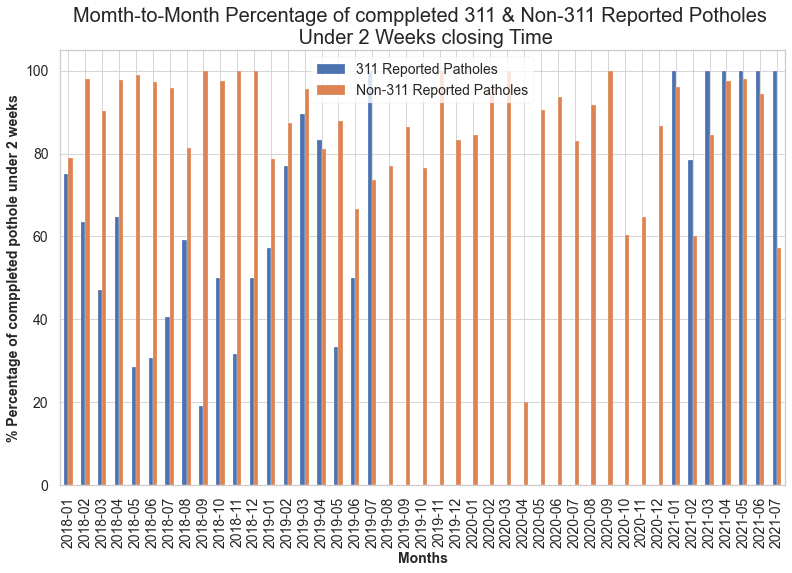

In [59]:
# Ploting the data:
ax=df_path_U2W.plot(kind='bar',fontsize=14, figsize= (13,8))
legend(['311 Reported Patholes', 'Non-311 Reported Patholes'], fontsize=14)
ax.set_title("Momth-to-Month Percentage of comppleted 311 & Non-311 Reported Potholes \n Under 2 Weeks closing Time", fontsize=20)
ax.set_xlabel("Months", weight='bold',fontsize=14)
ax.set_ylabel("% Percentage of comppleted pothole under 2 weeks", weight='bold',fontsize=14)

# 4 - Extra-Credit!  Creation of a map showing pothole requests in 2021.

In [60]:
# Preparing the potholes requests in 2021 Data:
data_path=data[(data['Work Type']=='HYWY-Pothole')]
data_path.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
0,Complete,187,Pearl Ave,HYWY-Pothole,1/1/2021 1:08:17 PM,fd_revere_integration@dudesolutions.com,2/23/2021 11:28:12 AM
4,Complete,65,Haddon St,HYWY-Pothole,1/10/2019 2:07:17 PM,adeangelis@revere.org,1/10/2019 2:07:18 PM
5,Complete,0,Beach St between Library And Immaculate Concep...,HYWY-Pothole,1/10/2019 2:09:37 PM,adeangelis@revere.org,1/10/2019 2:09:38 PM
6,Complete,0,Tuckerman St and Malden St,HYWY-Pothole,1/10/2019 2:11:06 PM,adeangelis@revere.org,1/10/2019 2:11:07 PM
7,Complete,190,Garfield Ave,HYWY-Pothole,1/10/2019 2:20:02 PM,acardona-ramirez@revere.org,2/22/2019 11:55:23 AM


In [61]:
# Converting Strings to datetime in coulumns with dates:
data_path['Date Flagged']=pd.to_datetime(data_path['Date Flagged'])
data_path['Finalized Date']=pd.to_datetime(data_path['Finalized Date'])
data_path.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date
0,Complete,187,Pearl Ave,HYWY-Pothole,2021-01-01 13:08:17,fd_revere_integration@dudesolutions.com,2021-02-23 11:28:12
4,Complete,65,Haddon St,HYWY-Pothole,2019-01-10 14:07:17,adeangelis@revere.org,2019-01-10 14:07:18
5,Complete,0,Beach St between Library And Immaculate Concep...,HYWY-Pothole,2019-01-10 14:09:37,adeangelis@revere.org,2019-01-10 14:09:38
6,Complete,0,Tuckerman St and Malden St,HYWY-Pothole,2019-01-10 14:11:06,adeangelis@revere.org,2019-01-10 14:11:07
7,Complete,190,Garfield Ave,HYWY-Pothole,2019-01-10 14:20:02,acardona-ramirez@revere.org,2019-02-22 11:55:23


In [62]:
# Creation of Month and Year columns of Finalized Date:
data_path['Fin_Month'] = pd.to_datetime(data_path['Finalized Date']).dt.month
data_path['Fin_Year'] = pd.to_datetime(data_path['Finalized Date']).dt.year
data_path.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year
0,Complete,187,Pearl Ave,HYWY-Pothole,2021-01-01 13:08:17,fd_revere_integration@dudesolutions.com,2021-02-23 11:28:12,2,2021
4,Complete,65,Haddon St,HYWY-Pothole,2019-01-10 14:07:17,adeangelis@revere.org,2019-01-10 14:07:18,1,2019
5,Complete,0,Beach St between Library And Immaculate Concep...,HYWY-Pothole,2019-01-10 14:09:37,adeangelis@revere.org,2019-01-10 14:09:38,1,2019
6,Complete,0,Tuckerman St and Malden St,HYWY-Pothole,2019-01-10 14:11:06,adeangelis@revere.org,2019-01-10 14:11:07,1,2019
7,Complete,190,Garfield Ave,HYWY-Pothole,2019-01-10 14:20:02,acardona-ramirez@revere.org,2019-02-22 11:55:23,2,2019


In [63]:
#Data for the pothole requests in 2021
data_path_Req2021=data_path[(data_path['Fin_Year']==2021)]
data_path_Req2021.head()

,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year
0,Complete,187,Pearl Ave,HYWY-Pothole,2021-01-01 13:08:17,fd_revere_integration@dudesolutions.com,2021-02-23 11:28:12,2,2021
17,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:39:13,rkantor@revere.org,2021-01-13 09:05:39,1,2021
18,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:40:09,rkantor@revere.org,2021-01-13 09:05:43,1,2021
41,Complete,177,Shirley Ave,HYWY-Pothole,2021-01-11 17:08:36,fd_revere_integration@dudesolutions.com,2021-01-14 09:59:16,1,2021
52,Complete,321,R Charger Street,HYWY-Pothole,2021-01-12 10:00:00,rkantor@revere.org,2021-01-13 09:05:33,1,2021


In [64]:
# We are running a data analysis on a dataset that has physical addresses and 
# we Would like to plot those on a map. we will need to geocode them to generate 
# their latitude and longitude co-ordinates.
# We will Import the "geopy" library. We will be using the "Nominatim" geocoding service. 
# There are many geocoding services available, but this one does not require an API key to access.
##################################################################################################
# Create a geolocator object using the Openstreet Nominatim API. It’s a good idea to increase the default timeout 
# setting from 1s to 10s so that we don’t get a TimedOut exception. We will also need to enter a name (any name) 
# for the ‘user_agent’ attribute.

In [65]:
data_path_Req2021['full_address']=data_path_Req2021['Address Number']+" "+data_path_Req2021['Street Name']+","+"Revere"+","+"MA"
data_path_Req2021['full_address'].astype(str)

geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")

# We add a column for the geocodes. We use the geolocator to populate the geocodes for each address.
data_path_Req2021['gcode'] = data_path_Req2021.full_address.apply(geolocator.geocode)
# Delete Rows with "None" value in 'gcode' columns
data_path_Req2021 = data_path_Req2021.replace(to_replace='None', value=np.nan).dropna()

# Extract latitude and longitude to their own columns
data_path_Req2021['latitude'] = [g.latitude for g in data_path_Req2021.gcode]
data_path_Req2021['longitude'] = [g.longitude for g in data_path_Req2021.gcode]

data_path_Req2021.head()


,Status,Address Number,Street Name,Work Type,Date Flagged,Flagged By,Finalized Date,Fin_Month,Fin_Year,full_address,gcode,latitude,longitude
0,Complete,187,Pearl Ave,HYWY-Pothole,2021-01-01 13:08:17,fd_revere_integration@dudesolutions.com,2021-02-23 11:28:12,2,2021,"187 Pearl Ave,Revere,MA","(185;187, Pearl Avenue, Beachmont, Revere, Suf...",42.394180,-70.988123
17,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:39:13,rkantor@revere.org,2021-01-13 09:05:39,1,2021,"321R Charger Street,Revere,MA","(321, Charger Street, Revere, Suffolk County, ...",42.426551,-71.009101
18,Complete,321R,Charger Street,HYWY-Pothole,2021-01-10 10:40:09,rkantor@revere.org,2021-01-13 09:05:43,1,2021,"321R Charger Street,Revere,MA","(321, Charger Street, Revere, Suffolk County, ...",42.426551,-71.009101
41,Complete,177,Shirley Ave,HYWY-Pothole,2021-01-11 17:08:36,fd_revere_integration@dudesolutions.com,2021-01-14 09:59:16,1,2021,"177 Shirley Ave,Revere,MA","(177, Shirley Avenue, Crescent Beach, Revere, ...",42.407534,-70.994233
52,Complete,321,R Charger Street,HYWY-Pothole,2021-01-12 10:00:00,rkantor@revere.org,2021-01-13 09:05:33,1,2021,"321 R Charger Street,Revere,MA","(321, Charger Street, Revere, Suffolk County, ...",42.426551,-71.009101


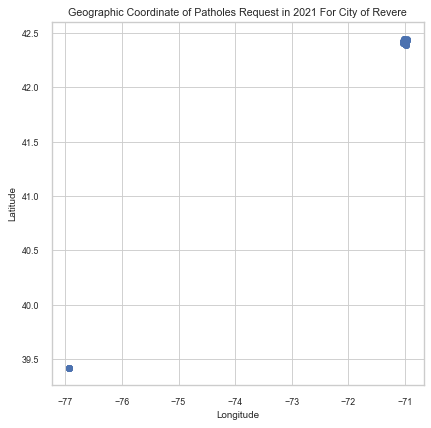

In [66]:
# Ploting the logitude values verus latitude to check for outliers data
plt.figure(figsize=(6, 6), dpi=80)
plt.title('Geographic Coordinate of Patholes Request in 2021 For City of Revere')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(data_path_Req2021['longitude'], data_path_Req2021['latitude'])
plt.show()

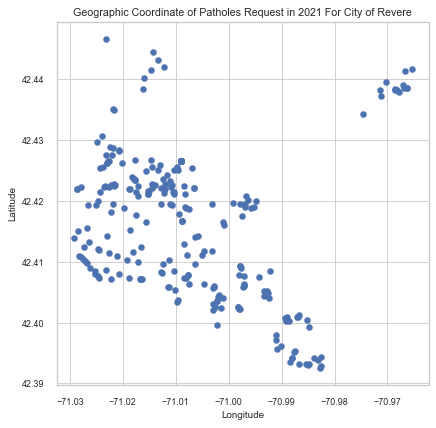

In [67]:
# There is an outlier value that we should take off our data which had latitude below 39.5
data_path_Req2021.drop(data_path_Req2021[(data_path_Req2021["latitude"]<39.5)].index,axis=0,inplace=True)
plt.figure(figsize=(6, 6), dpi=80)
plt.title('Geographic Coordinate of Patholes Request in 2021 For City of Revere')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(data_path_Req2021['longitude'], data_path_Req2021['latitude'])
plt.show()

# Mapping the addresses in pandas DataFrame using Folium

In [68]:
# Now that we have the latitude and longitude, we can plot our addresses using Folium, 
# a python library for making interactive maps.
# Fiest create an empty map. Center it on a region that encompasses our addresses.
# Revere, MA, USA Geographic information:Latitude:42.408428 , Longitude:-71.011993
map_path2021_Revere = folium.Map(location=(42.408428,-71.011993), zoom_start=5)
display(map_path2021_Revere)

# Map showing pothole requests in 2021 - City of Revere, MA

In [69]:
# Add the geocoded locations to the map
for index, row in data_path_Req2021.iterrows():
    folium.Marker(location=(row['latitude'],row['longitude'])).add_to(map_path2021_Revere)
display(map_path2021_Revere)
map_path2021_Revere.save("map_path2021_Revere.html")